In [16]:
import pandas as pd 
import nltk
import re
#Try also with encoding='ISO-8859-1' 
df = pd.read_csv("training.1600000.processed.noemoticon.csv", header=None ,encoding='latin')


In [17]:
df.columns = ['pola', 'id', 'date', 'query', 'user', 'text']

In [18]:
# Remove URLs from tweets
df['clean_tweet'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove user mentions (@)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'@[A-Za-z0-9_]+', '', x))

# remove numbers and special characters
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))

# to lowercase
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())


In [19]:
#Remove spaces
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [20]:
# Drop unnecessary columns
df = df.drop(['id', 'date', 'query', 'user', 'text'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   pola         1600000 non-null  int64 
 1   clean_tweet  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [25]:
print(df.iloc[799999])

pola                                                           0
clean_tweet    has to resit exams over summer wishes he worke...
Name: 799999, dtype: object


In [26]:
print(df.iloc[800000])

pola                                   4
clean_tweet    i love u guys r the best 
Name: 800000, dtype: object


In [30]:
print(df)

         pola                                        clean_tweet
0           0   awww thats a bummer you shoulda got david car...
1           0  is upset that he cant update his facebook by t...
2           0   i dived many times for the ball managed to sa...
3           0    my whole body feels itchy and like its on fire 
4           0   no its not behaving at all im mad why am i he...
...       ...                                                ...
1599995     4  just woke up having no school is the best feel...
1599996     4   thewdbcom very cool to hear old walt interviews 
1599997     4  are you ready for your mojo makeover ask me fo...
1599998     4  happy th birthday to my boo of alll time tupac...
1599999     4                              happy charitytuesday 

[1600000 rows x 2 columns]


In [31]:
print(df.columns)

Index(['pola', 'clean_tweet'], dtype='object')


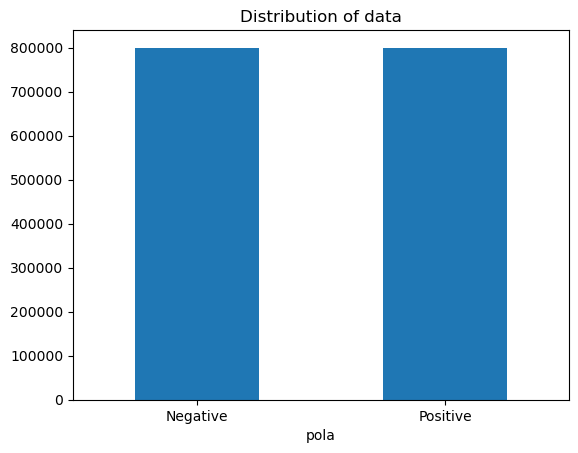

In [28]:
# Plotting the distribution for dataset.
ax = df.groupby('pola').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(df['clean_tweet']), list(df['pola'])

In [ ]:
neg_tweets = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [42]:
#Wordcloud for negative tweets
import plotly.express as px
#from IPython.core.display import HTML
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly.offline import plot
#import matplotlib.pyplot as plt
#import mpld3

data_neg = df['clean_tweet'][:800000]

# Join all tweets into a single string
#text = " ".join(tweet for tweet in data_neg)

# Create a wc object
wc = WordCloud(stopwords=STOPWORDS, background_color="white", colormap="Reds", width=800, height=400).generate(' '.join(data_neg))
# Convert Word Cloud to plotly format
wordcloud_fig = go.Figure(
    data=go.Scatter(
        x=[],
        y=[],
        mode='text',
        text=wordcloud.words_,
        textfont=dict(size=wordcloud.ranks_),
        hoverinfo='text',
        textposition='middle center'
    )
)


# Add hover information to the Word Cloud
wordcloud_fig.update_traces(
    hovertext=[f'Word: {word}<br>Count: {count}' for word, count in wordcloud.words_.items()]
)

# Set layout options
wordcloud_fig.update_layout(
    hoverlabel=dict(
        bgcolor='white',
        font_size=16,
        font_family='Helvetica'
    ),
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor='white',
    width=800,
    height=400,
)

# Render and display the plot
plot(wordcloud_fig, auto_open=True, output_type='svg')

In [46]:
import pandas as pd
import plotly.graph_objects as go
from wordcloud import WordCloud


# Get the top 100 most frequent words in the negative tweets
data_neg = df['clean_tweet'][:800000]
wordcloud_neg = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(data_neg.value_counts().head(100))


# # Create a plotly figure for the wordcloud
# fig = go.Figure(data=[go.Scatter(x=[0], y=[0], mode='text', text=wordcloud_neg.words_, 
#                                  hovertemplate='%{text}: %{marker.size} mentions', 
#                                  marker=dict(color=wordcloud_neg.colors_, 
#                                              size=wordcloud_neg.frequencies_))])

# # Set layout properties
# fig.update_layout(width=900, height=900, showlegend=False, 
#                   xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                   yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# # Display the figure
# fig.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_tweet'], df['pola'], test_size=0.1, random_state=6)

In [61]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out())) 


Vectoriser fitted.
No. of feature_words:  500000


In [69]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [70]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     79928
           4       0.81      0.82      0.82     80072

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



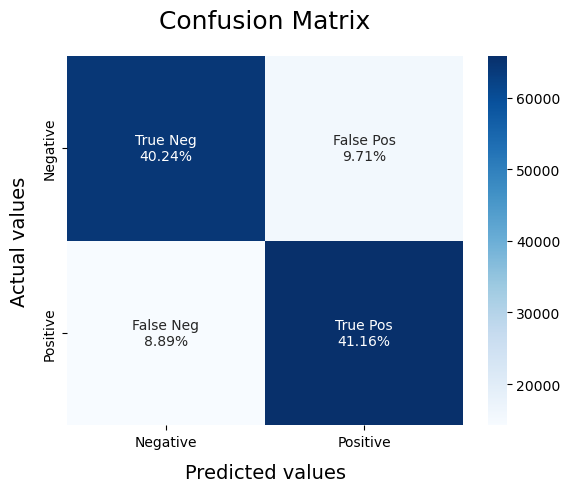

In [71]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     79928
           4       0.82      0.83      0.83     80072

    accuracy                           0.82    160000
   macro avg       0.82      0.82      0.82    160000
weighted avg       0.82      0.82      0.82    160000



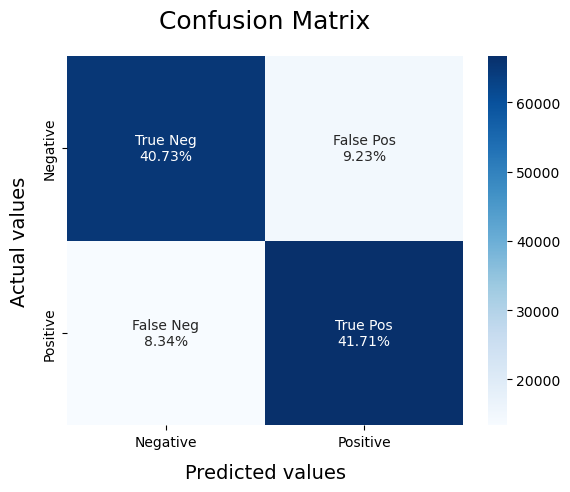

In [18]:
df = df.dropna()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   pola         1599999 non-null  int64 
 1   clean_tweet  1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
None


In [15]:

# Save cleaned dataset to a new CSV file
#df.to_csv('preprocessed_tweets2.csv', index=False)

In [21]:
# from tqdm import tqdm
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold

# # Vectorize the tweets using TF-IDF
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# X = vectorizer.fit_transform(df['clean_tweet'])
# y = df['pola']

# # Train a logistic regression model using KFold cross-validation
# kf = KFold(n_splits=5)
# accuracy_scores = []
# for train_idx, test_idx in tqdm(kf.split(X)):
#     X_train, y_train = X[train_idx], y[train_idx]
#     X_test, y_test = X[test_idx], y[test_idx]
#     lr = LogisticRegression()
#     lr.fit(X_train, y_train)
#     y_pred = lr.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracy_scores.append(accuracy)

# # Calculate the mean accuracy across all folds
# mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
# print(f'Mean accuracy: {mean_accuracy:.2f}')

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Vectorize the tweets using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['pola']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X.toarray())

# Train a logistic regression model using KFold cross-validation
kf = KFold(n_splits=5)
accuracy_scores = []
for train_idx, test_idx in tqdm(kf.split(X)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f'Mean accuracy: {mean_accuracy:.2f}')


MemoryError: Unable to allocate 4.90 TiB for an array with shape (1599999, 421129) and data type float64